<a href="https://colab.research.google.com/github/dasog94/stock/blob/master/my_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Input, Model, layers
from tensorflow.keras import optimizers
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds
from sklearn.preprocessing import MinMaxScaler

#NASDAQ

In [ ]:
data = (pd.read_csv('/content/gdrive/My Drive/Stock_Prediction/2D-ALSTM/nasdaq100_padding.csv'))

In [ ]:
data.head()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,AMZN,ATVI,AVGO,BBBY,BIDU,BIIB,CA,CELG,CERN,CMCSA,COST,CSCO,CSX,CTRP,CTSH,DISCA,DISH,DLTR,EA,EBAY,ESRX,EXPE,FAST,FB,FOX,FOXA,GILD,GOOGL,INTC,JD,...,LBTYK,LRCX,MAR,MAT,MCHP,MDLZ,MSFT,MU,MXIM,MYL,NCLH,NFLX,NTAP,NVDA,NXPI,PAYX,PCAR,PYPL,QCOM,QVCA,ROST,SBUX,SIRI,STX,SWKS,SYMC,TMUS,TRIP,TSCO,TSLA,TXN,VIAB,VOD,VRTX,WBA,WDC,WFM,XLNX,YHOO,NDX
0,35.9800,96.80,97.80,61.15,95.4000,58.180000,58.00,127.040,26.680,165.8100,742.12,42.30,161.41,44.21,159.89,286.32,34.57,106.0500,62.070000,67.34,167.60,30.790,28.3700,43.52,58.40,25.42,52.440000,96.55,76.95,30.60,76.54,117.88,41.990,121.940,27.50,26.86,84.00,756.5700,34.7700,21.8000,...,30.21,91.24,71.1100,32.78,54.78,45.690,56.515,14.0000,39.20,47.130,41.900,91.00,26.4400,56.1984,85.2300,60.740,56.170,37.7700,60.95,26.74,61.13,58.579,4.280,31.350,65.36,20.37,44.950,70.0500,91.41,227.6500,70.73,45.230,31.1701,95.270,81.365,52.16,33.95,48.61,38.010,4665.054
1,35.9310,96.89,97.80,61.61,95.4115,58.190000,58.12,126.060,26.730,165.9101,741.92,42.44,161.83,44.09,160.13,286.81,34.58,105.5450,61.930000,67.30,167.82,30.840,28.4625,43.52,58.33,25.41,52.110000,96.82,77.07,30.74,76.44,117.99,41.900,121.745,27.48,26.87,83.97,756.1600,34.9200,21.8500,...,30.43,91.33,70.8500,32.79,54.89,45.730,56.720,14.0000,39.37,47.150,41.810,91.16,26.4500,56.4150,86.1750,60.935,56.850,37.7400,60.92,26.72,61.43,58.480,4.270,31.010,65.25,20.41,44.975,70.2300,91.05,227.0967,70.69,45.010,31.1900,94.170,81.540,52.15,34.10,48.74,38.140,4665.054
2,35.9044,96.95,97.57,61.98,95.5100,58.203333,57.95,126.510,26.712,166.1800,739.60,42.46,162.50,43.86,160.00,286.13,34.59,106.5787,61.916667,67.23,167.96,30.880,28.3900,43.54,58.34,25.38,52.106667,96.89,77.25,30.80,76.09,118.63,41.735,121.452,27.41,26.82,84.00,755.6200,34.9192,21.7700,...,30.17,91.37,70.7800,32.83,55.14,45.800,56.700,14.0056,39.38,47.130,41.865,91.36,26.3900,56.4900,85.6801,61.000,57.500,37.7117,61.03,26.66,61.55,58.510,4.285,31.195,65.41,20.39,44.810,70.0925,91.18,226.6300,71.30,45.015,31.2100,94.749,81.530,52.27,34.01,48.99,38.150,4665.826
3,35.8900,96.97,97.55,62.09,95.5200,58.216667,57.96,126.280,26.740,166.1480,739.55,42.52,162.68,43.80,160.12,286.80,34.61,106.3500,61.903333,67.38,167.85,30.890,28.3900,43.55,58.54,25.37,52.103333,96.76,76.96,30.86,75.65,118.57,41.710,121.450,27.42,26.87,83.34,756.3599,34.9510,21.8100,...,30.10,91.42,70.8750,32.86,55.31,45.790,56.690,14.0573,39.42,47.115,41.920,92.28,26.3955,56.5335,85.6650,61.008,57.750,37.8250,61.13,26.73,61.50,58.470,4.280,31.140,65.24,20.37,44.690,69.9550,91.28,227.5300,71.31,45.020,31.2100,94.310,81.710,52.30,33.96,48.95,38.195,4667.081
4,36.0080,96.96,97.73,61.89,95.5300,58.230000,58.21,126.585,26.720,165.9900,738.72,42.61,162.75,43.92,160.86,286.42,34.62,106.0000,61.890000,67.30,168.44,30.875,28.3900,43.63,58.56,25.32,52.100000,96.76,77.03,30.89,76.50,118.42,41.820,121.380,27.40,26.83,82.48,755.6700,34.9500,21.8593,...,30.12,91.45,71.1299,32.86,55.28,45.765,56.690,14.0701,39.54,47.010,41.920,91.86,26.4010,56.5200,85.8700,61.110,57.165,37.7972,61.16,26.68,61.42,58.490,4.215,31.050,65.33,20.36,44.610,69.7401,91.16,227.1250,71.06,45.050,31.1800,94.155,81.720,52.30,34.17,48.89,38.320,4664.491


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40560 entries, 0 to 40559
Data columns (total 82 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAL     40560 non-null  float64
 1   AAPL    40560 non-null  float64
 2   ADBE    40560 non-null  float64
 3   ADI     40560 non-null  float64
 4   ADP     40560 non-null  float64
 5   ADSK    40560 non-null  float64
 6   AKAM    40560 non-null  float64
 7   ALXN    40560 non-null  float64
 8   AMAT    40560 non-null  float64
 9   AMGN    40560 non-null  float64
 10  AMZN    40560 non-null  float64
 11  ATVI    40560 non-null  float64
 12  AVGO    40560 non-null  float64
 13  BBBY    40560 non-null  float64
 14  BIDU    40560 non-null  float64
 15  BIIB    40560 non-null  float64
 16  CA      40560 non-null  float64
 17  CELG    40560 non-null  float64
 18  CERN    40560 non-null  float64
 19  CMCSA   40560 non-null  float64
 20  COST    40560 non-null  float64
 21  CSCO    40560 non-null  float64
 22

In [ ]:
data=data.dropna(axis=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40560 entries, 0 to 40559
Data columns (total 82 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAL     40560 non-null  float64
 1   AAPL    40560 non-null  float64
 2   ADBE    40560 non-null  float64
 3   ADI     40560 non-null  float64
 4   ADP     40560 non-null  float64
 5   ADSK    40560 non-null  float64
 6   AKAM    40560 non-null  float64
 7   ALXN    40560 non-null  float64
 8   AMAT    40560 non-null  float64
 9   AMGN    40560 non-null  float64
 10  AMZN    40560 non-null  float64
 11  ATVI    40560 non-null  float64
 12  AVGO    40560 non-null  float64
 13  BBBY    40560 non-null  float64
 14  BIDU    40560 non-null  float64
 15  BIIB    40560 non-null  float64
 16  CA      40560 non-null  float64
 17  CELG    40560 non-null  float64
 18  CERN    40560 non-null  float64
 19  CMCSA   40560 non-null  float64
 20  COST    40560 non-null  float64
 21  CSCO    40560 non-null  float64
 22

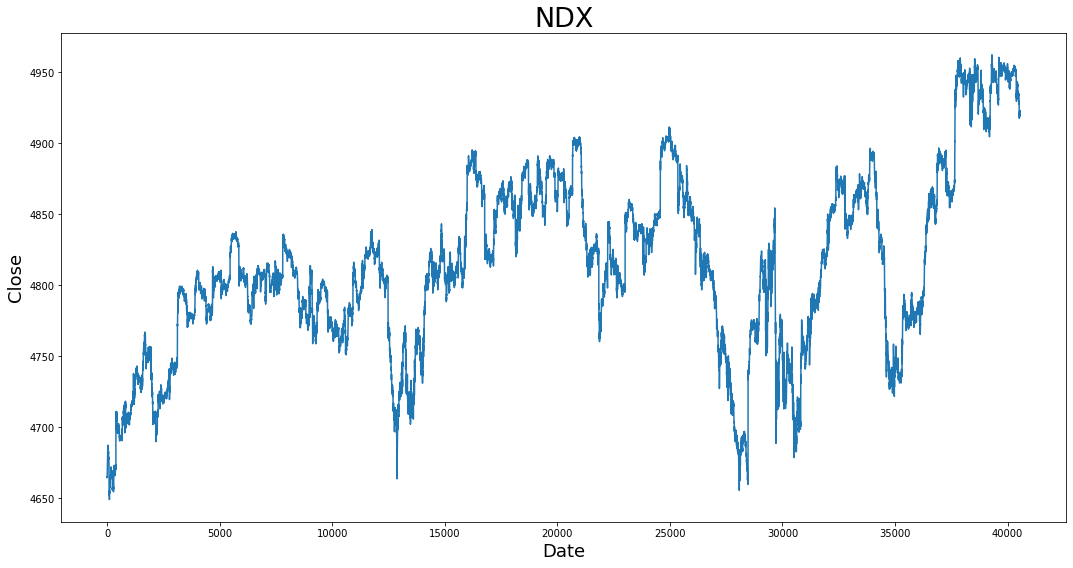

In [ ]:
plt.figure(figsize=(18, 9))
plt.plot(range(data.shape[0]),(data['NDX']))
plt.title('NDX', fontsize = 27)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close", fontsize=18)
plt.show()

In [ ]:
# scaler = MinMaxScaler()
# scaler.fit_transform(data)

In [ ]:
times = sorted(data.index.values)
last_30 = sorted(data.index.values)[-int(0.3*len(times))]

print(last_30)
test_df = data[(data.index >= last_30)] #val쪼개기전



train_df = data[(data.index < last_30)]
val_df = test_df[:len(test_df)//2]
test_df = test_df[len(test_df)//2:]

28392


In [ ]:
train_df.head()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,AMZN,ATVI,AVGO,BBBY,BIDU,BIIB,CA,CELG,CERN,CMCSA,COST,CSCO,CSX,CTRP,CTSH,DISCA,DISH,DLTR,EA,EBAY,ESRX,EXPE,FAST,FB,FOX,FOXA,GILD,GOOGL,INTC,JD,...,LBTYK,LRCX,MAR,MAT,MCHP,MDLZ,MSFT,MU,MXIM,MYL,NCLH,NFLX,NTAP,NVDA,NXPI,PAYX,PCAR,PYPL,QCOM,QVCA,ROST,SBUX,SIRI,STX,SWKS,SYMC,TMUS,TRIP,TSCO,TSLA,TXN,VIAB,VOD,VRTX,WBA,WDC,WFM,XLNX,YHOO,NDX
0,35.9800,96.80,97.80,61.15,95.4000,58.180000,58.00,127.040,26.680,165.8100,742.12,42.30,161.41,44.21,159.89,286.32,34.57,106.0500,62.070000,67.34,167.60,30.790,28.3700,43.52,58.40,25.42,52.440000,96.55,76.95,30.60,76.54,117.88,41.990,121.940,27.50,26.86,84.00,756.5700,34.7700,21.8000,...,30.21,91.24,71.1100,32.78,54.78,45.690,56.515,14.0000,39.20,47.130,41.900,91.00,26.4400,56.1984,85.2300,60.740,56.170,37.7700,60.95,26.74,61.13,58.579,4.280,31.350,65.36,20.37,44.950,70.0500,91.41,227.6500,70.73,45.230,31.1701,95.270,81.365,52.16,33.95,48.61,38.010,4665.054
1,35.9310,96.89,97.80,61.61,95.4115,58.190000,58.12,126.060,26.730,165.9101,741.92,42.44,161.83,44.09,160.13,286.81,34.58,105.5450,61.930000,67.30,167.82,30.840,28.4625,43.52,58.33,25.41,52.110000,96.82,77.07,30.74,76.44,117.99,41.900,121.745,27.48,26.87,83.97,756.1600,34.9200,21.8500,...,30.43,91.33,70.8500,32.79,54.89,45.730,56.720,14.0000,39.37,47.150,41.810,91.16,26.4500,56.4150,86.1750,60.935,56.850,37.7400,60.92,26.72,61.43,58.480,4.270,31.010,65.25,20.41,44.975,70.2300,91.05,227.0967,70.69,45.010,31.1900,94.170,81.540,52.15,34.10,48.74,38.140,4665.054
2,35.9044,96.95,97.57,61.98,95.5100,58.203333,57.95,126.510,26.712,166.1800,739.60,42.46,162.50,43.86,160.00,286.13,34.59,106.5787,61.916667,67.23,167.96,30.880,28.3900,43.54,58.34,25.38,52.106667,96.89,77.25,30.80,76.09,118.63,41.735,121.452,27.41,26.82,84.00,755.6200,34.9192,21.7700,...,30.17,91.37,70.7800,32.83,55.14,45.800,56.700,14.0056,39.38,47.130,41.865,91.36,26.3900,56.4900,85.6801,61.000,57.500,37.7117,61.03,26.66,61.55,58.510,4.285,31.195,65.41,20.39,44.810,70.0925,91.18,226.6300,71.30,45.015,31.2100,94.749,81.530,52.27,34.01,48.99,38.150,4665.826
3,35.8900,96.97,97.55,62.09,95.5200,58.216667,57.96,126.280,26.740,166.1480,739.55,42.52,162.68,43.80,160.12,286.80,34.61,106.3500,61.903333,67.38,167.85,30.890,28.3900,43.55,58.54,25.37,52.103333,96.76,76.96,30.86,75.65,118.57,41.710,121.450,27.42,26.87,83.34,756.3599,34.9510,21.8100,...,30.10,91.42,70.8750,32.86,55.31,45.790,56.690,14.0573,39.42,47.115,41.920,92.28,26.3955,56.5335,85.6650,61.008,57.750,37.8250,61.13,26.73,61.50,58.470,4.280,31.140,65.24,20.37,44.690,69.9550,91.28,227.5300,71.31,45.020,31.2100,94.310,81.710,52.30,33.96,48.95,38.195,4667.081
4,36.0080,96.96,97.73,61.89,95.5300,58.230000,58.21,126.585,26.720,165.9900,738.72,42.61,162.75,43.92,160.86,286.42,34.62,106.0000,61.890000,67.30,168.44,30.875,28.3900,43.63,58.56,25.32,52.100000,96.76,77.03,30.89,76.50,118.42,41.820,121.380,27.40,26.83,82.48,755.6700,34.9500,21.8593,...,30.12,91.45,71.1299,32.86,55.28,45.765,56.690,14.0701,39.54,47.010,41.920,91.86,26.4010,56.5200,85.8700,61.110,57.165,37.7972,61.16,26.68,61.42,58.490,4.215,31.050,65.33,20.36,44.610,69.7401,91.16,227.1250,71.06,45.050,31.1800,94.155,81.720,52.30,34.17,48.89,38.320,4664.491


In [ ]:
train_ = train_df.values
val_ = val_df.values
test_ = test_df.values

In [ ]:
print("train shape {0}".format(train_.shape))
print("val shape {0}".format(val_.shape))
print("test shape {0}".format(test_.shape))

train shape (28392, 82)
val shape (6084, 82)
test shape (6084, 82)


In [ ]:
scaler = MinMaxScaler()
scale_close = MinMaxScaler()

In [ ]:
# x = train_[:, :-1]
# y = train_[:, -1]

# scale_close.fit(y.reshape(-1, 1))

In [ ]:
# scaler.fit(train_)
scaler.fit(data)


train_ = scaler.transform(train_)
val_ = scaler.transform(val_)
test_ = scaler.transform(test_)

# scale_close.transform()

In [ ]:
SEQ_LEN = 15
FUTURE_PERIOD = 1

RATIO_TO_PREDICT = "Close"

In [ ]:
def split_data(data):
  X = []
  Y = []
  Z = []

  for i in range(SEQ_LEN, len(data)-FUTURE_PERIOD+1):
    X.append(data[i-SEQ_LEN:i, :-1])
    Y.append(data[i-SEQ_LEN:i, -1])
    Z.append(data[i+(FUTURE_PERIOD-1), -1])


  return np.array(X), np.array(Y), np.array(Z)

In [ ]:
X_train, y_train, z_train = split_data(train_)
X_val, y_val, z_val = split_data(val_)
X_test, y_test, z_test = split_data(test_)

# z_train.reshape(-1, 1)
# z_val.reshape(-1, 1)
# z_test.reshape(-1, 1)

In [ ]:
print(X_train.shape, y_train.shape, z_train.shape)
print(X_val.shape, y_val.shape, z_val.shape)
print(X_test.shape, y_test.shape, z_test.shape)


(28377, 15, 81) (28377, 15) (28377,)
(6069, 15, 81) (6069, 15) (6069,)
(6069, 15, 81) (6069, 15) (6069,)


In [ ]:
print("X_train shape {0}".format(X_train.shape))
print("X_val shape {0}".format(X_val.shape))
print("X_test shape {0}".format(X_test.shape))

X_train shape (28377, 15, 81)
X_val shape (6069, 15, 81)
X_test shape (6069, 15, 81)


In [ ]:
print("y_train shape {0}".format(y_train.shape))
print("y_val shape {0}".format(y_val.shape))
print("y_test shape {0}".format(y_test.shape))

y_train shape (28377, 15)
y_val shape (6069, 15)
y_test shape (6069, 15)


In [ ]:
idx = np.isfinite(X_train.all()) & np.isfinite(y_train.all()) & np.isfinite(z_train.all()) 
print(idx)

True


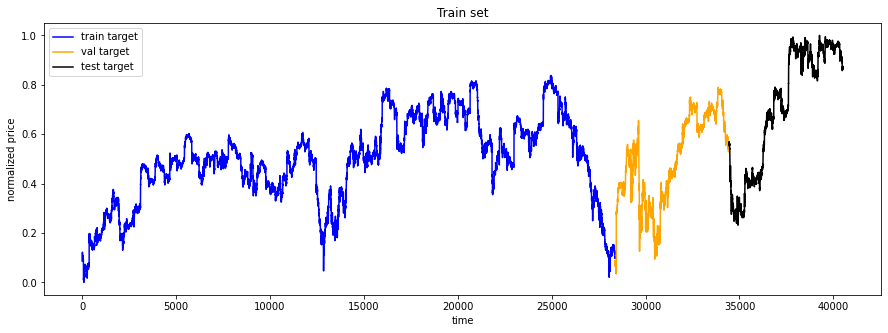

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(np.arange(z_train.shape[0]), z_train, color='blue', label='train target')
plt.plot(np.arange(z_train.shape[0], z_train.shape[0] + z_val.shape[0]), z_val, color='orange', label='val target')
plt.plot(np.arange(z_train.shape[0]+ z_val.shape[0], z_train.shape[0] + z_val.shape[0] + z_test.shape[0]), z_test, color='black', label='test target')

plt.title('Train set')
plt.xlabel('time')
plt.ylabel('normalized price')
plt.legend(loc='best')

#현대차

In [149]:
def drop_data(df):
  df = df.drop('Unnamed: 0',1)
  df = df.drop('수정구분', 1)
  df = df.drop('수정비율', 1)
  df = df.drop('종가등락구분', 1)
  df = df.drop('candle body', 1)
  df = df.drop('거래대금', 1)
  df = df.drop('MA5', 1)
  df = df.drop('MA20', 1)
  df = df.drop('MA60', 1)
  df = df.drop('MA120', 1)
  df = df.drop('TR5', 1)
  df = df.drop('TR20', 1)
  df = df.drop('TR60', 1)
  df = df.drop('TR120', 1)
  df = df.drop('OBV', 1)
  df = df.drop('OBV_5MA', 1)
  df = df.drop('OBV_OSC', 1)
  df = df.drop('MACD', 1)
  df = df.drop('MACD_Signal', 1)
  df = df.drop('MACD_OSC', 1)
  df = df.drop('ATR', 1)
  df = df.drop('이격도5', 1)
  df = df.drop('이격도20', 1)
  df = df.drop('이격도60', 1)
  df = df.drop('이격도120', 1)
  df = df.drop('Fast_K', 1)
  df = df.drop('Fast_D', 1)
  df = df.drop('Slow_K', 1)
  df = df.drop('Slow_D', 1)
  df = df.drop('candle_ratio', 1)
  df = df.drop('Bol_upper', 1)
  df = df.drop('Bol_lower', 1)
  df = df.drop('candle_uppertail', 1)
  df = df.drop('candle_lowertail', 1)
  
  lst = ['날짜', '시간', '시가', '고가', '저가', '종가', '거래량']
  for i in df.columns:
    if i not in lst:
      df = df.drop(i, 1)

  return df

df = pd.read_csv('/content/gdrive/My Drive/Stock_Prediction/Vanilla/현대차_train_modi.csv')  #현차
#df = pd.read_csv('/content/drive/My Drive/5개 데이터 전처리/kodex200_train_modi.csv')  #코스피
#df = pd.read_csv('/content/drive/My Drive/5개 데이터 전처리/카카오_train_modi.csv')  #카카오

df = drop_data(df) ## 날짜, 시간, 5개 특성만 남기는 함수
df = df.dropna(0)

print(df)

data = df.values
print("data :", data[:, 2:].shape)
scaler = MinMaxScaler()
scaler.fit(data[:, 2:])

temp = list(df['날짜'])

df1 = df.iloc[:temp.index(20200701.0)] # .csv에서 ~20200701날짜 까지 데이터 추리기 // 약 8.7만개
df2 = df.iloc[temp.index(20200701.0):temp.index(20200803.0)] # .csv에서 20200701~20200803날짜 까지 데이터 추리기 // 약 1달 평가
df3 = df.iloc[temp.index(20200803.0):] #.csv에서 20200803~ 데이터 추리기 // 약 20일정도 -> 일일 평가 위해서

print(df1.shape)
print(df2.shape)
print(df3.shape)

              날짜      시간      시가      고가      저가      종가    거래량
0       20190726   90100  130500  131000  130500  131000   4306
1       20190726   90200  131000  132000  131000  131500   3751
2       20190726   90300  131500  131500  131000  131500   1699
3       20190726   90400  131500  131500  131000  131000    233
4       20190726   90500  131500  131500  131000  131000    662
...          ...     ...     ...     ...     ...     ...    ...
101208  20200821  151700  156000  156000  155500  155500   6995
101209  20200821  151800  155500  156000  155500  155500   6948
101210  20200821  151900  155500  156500  155500  156000  24125
101211  20200821  152000  156000  156500  156000  156500   3467
101212  20200821  153000  156000  156000  156000  156000  89846

[101213 rows x 7 columns]
data : (101213, 5)
(87116, 7)
(8763, 7)
(5334, 7)


In [120]:
df_13days = []

df_13days.append(df.iloc[temp.index(20200803.0):temp.index(20200804.0)])
df_13days.append(df.iloc[temp.index(20200804.0):temp.index(20200805.0)])
df_13days.append(df.iloc[temp.index(20200805.0):temp.index(20200806.0)])
df_13days.append(df.iloc[temp.index(20200806.0):temp.index(20200807.0)])
df_13days.append(df.iloc[temp.index(20200807.0):temp.index(20200810.0)])
df_13days.append(df.iloc[temp.index(20200810.0):temp.index(20200811.0)])
df_13days.append(df.iloc[temp.index(20200811.0):temp.index(20200812.0)])
df_13days.append(df.iloc[temp.index(20200812.0):temp.index(20200813.0)])
df_13days.append(df.iloc[temp.index(20200813.0):temp.index(20200814.0)])
df_13days.append(df.iloc[temp.index(20200814.0):temp.index(20200818.0)])
df_13days.append(df.iloc[temp.index(20200818.0):temp.index(20200819.0)])
df_13days.append(df.iloc[temp.index(20200819.0):temp.index(20200820.0)])
df_13days.append(df.iloc[temp.index(20200820.0):temp.index(20200821.0)])

print(len(df_13days))
print(df_13days[0].shape)

13
(381, 7)


In [108]:
def handle_dataframe(data):
  data = data.drop('날짜', 1)
  data = data.drop('시간', 1)
  # data = data.assign( Close = data['종가'])
  # data = data.drop('종가', 1)

  return data

def minmax_all(lst) :
  lst = np.array(lst)
  lst = lst.T
  for i in range(lst.shape[0]):
    lst[i] = normalize(lst[i])
  lst = lst.T
  return lst

def split_data(data, SEQ_LEN, FUTURE_PERIOD):
  X = []
  Y = []
  Z = []

  for i in range(SEQ_LEN + FUTURE_PERIOD, len(data) - FUTURE_PERIOD + 1):
    tmp = data[ i - SEQ_LEN - FUTURE_PERIOD : i, : ]
    # tmp = minmax_100000(tmp)
    # tmp = minmax_log_minmax_log(tmp)
    # tmp = minmax_log_minmaxlog_log(tmp)
    # tmp = minmax_all(tmp)
    X.append(np.concatenate([tmp[ : SEQ_LEN, 0: 3], tmp[ : SEQ_LEN, 4][:, np.newaxis]], axis=1))
    Y.append(tmp[ : SEQ_LEN, 3 ])
    Z.append(tmp[ SEQ_LEN + FUTURE_PERIOD -1 , 3 ])


  return np.array(X), np.array(Y), np.array(Z)



def split_data_day13(data, SEQ_LEN, FUTURE_PERIOD):
  X = []
  Y = []
  Z = []

  for i in range(SEQ_LEN + FUTURE_PERIOD, len(data) - FUTURE_PERIOD + 1):
    tmp = data[ i - SEQ_LEN - FUTURE_PERIOD : i, : ]
    # tmp = minmax_100000(tmp)
    # tmp = minmax_log_minmax_log(tmp)
    # tmp = minmax_log_minmaxlog_log(tmp)
    tmp = minmax_log_log_log(tmp)
    X.append(tmp[ : SEQ_LEN, : ])
    Y.append(tmp[ SEQ_LEN + FUTURE_PERIOD - 1 , 3 ])
    Z.append(data[ i - 1, 3 ])

  return np.array(X), np.array(Y), np.array(Z)

In [150]:
df1_data = handle_dataframe(df1).values
df2_data = handle_dataframe(df2).values

In [151]:
df1_data = scaler.transform(df1_data)
df2_data = scaler.transform(df2_data)

In [152]:
df1_data.shape

(87116, 5)

In [153]:
Day_size = 60
Pred_days = 10


# df1 = handle_dataframe(df1).values
# df2 = handle_dataframe(df2).values
X_train, y_train, z_train = split_data(df1_data, SEQ_LEN = Day_size, FUTURE_PERIOD = Pred_days)
X_test, y_test, z_test = split_data(df2_data, SEQ_LEN = Day_size, FUTURE_PERIOD = Pred_days)

# day13_x = []
# day13_y = []
# day13_z = []
# for i in range(len(df_13days)):
#   temp = handle_dataframe(df_13days[i]).values
#   oneday_x, oneday_y, oneday_z = split_data_day13(temp, SEQ_LEN = Day_size, FUTURE_PERIOD = Pred_days)
#   day13_x.append(oneday_x)
#   day13_y.append(oneday_y)
#   day13_z.append(oneday_z)

# day13_x = np.array(day13_x)
# day13_y = np.array(day13_y)[:, :, np.newaxis]
# day13_z = np.array(day13_z)[:, :, np.newaxis]

print(X_train.shape, y_train.shape, z_train.reshape(-1).shape)
print(X_test.shape, y_test.shape, z_test.reshape(-1).shape)
# print(day13_x.shape, day13_y.shape, day13_z.shape)

(87037, 60, 4) (87037, 60) (87037,)
(8684, 60, 4) (8684, 60) (8684,)


In [154]:
X_train[0]

array([[5.68815331e-01, 5.69939183e-01, 5.69565217e-01, 5.05822361e-03],
       [5.73170732e-01, 5.78627281e-01, 5.73913043e-01, 4.40626957e-03],
       [5.77526132e-01, 5.74283232e-01, 5.73913043e-01, 1.99580165e-03],
       [5.77526132e-01, 5.74283232e-01, 5.73913043e-01, 2.73703228e-04],
       [5.77526132e-01, 5.74283232e-01, 5.73913043e-01, 7.77646082e-04],
       [5.77526132e-01, 5.74283232e-01, 5.69565217e-01, 8.34383704e-03],
       [5.77526132e-01, 5.78627281e-01, 5.78260870e-01, 1.42607605e-03],
       [5.81881533e-01, 5.78627281e-01, 5.73913043e-01, 2.59724394e-03],
       [5.73170732e-01, 5.74283232e-01, 5.73913043e-01, 9.39753573e-04],
       [5.77526132e-01, 5.74283232e-01, 5.73913043e-01, 3.63332225e-03],
       [5.77526132e-01, 5.78627281e-01, 5.78260870e-01, 2.96727191e-03],
       [5.81881533e-01, 5.78627281e-01, 5.73913043e-01, 3.68500870e-03],
       [5.73170732e-01, 5.74283232e-01, 5.73913043e-01, 5.23912617e-04],
       [5.77526132e-01, 5.74283232e-01, 5.73913043e

#모델

In [111]:
class cnn(tf.keras.Model):
    def __init__(self, n, dynamic=True):
        super(cnn, self).__init__()
        self.n=n
        
        self.conv = []
        self.relu = []
        self.bn = []
        
        for f_i in range(n):
          self.conv.append(Conv1D(1,kernel_size=5,padding='same'))
          self.relu.append(LeakyReLU())
          self.bn.append(BatchNormalization())
        
        self.concat = Concatenate()

    def call(self, X, training=None):
        d_list=[]
        
        for i in range(self.n):
            c = Lambda(lambda x:x[:,:,i:i+1], name="Lambda_"+str(i))(X) # c = (batch, T, 1)
            c = self.relu[i](self.conv[i](c))
            c = self.bn[i](c)
            d_list.append(c)
            
        d = self.concat(d_list)
        
        return d # d = (batch, T, n)

In [112]:
class attention(tf.keras.Model):
  def __init__(self, units, mode=True): # input: units = T # temporal: units = n
  # def __init__(self, units, var_scope, reuse=tf.compat.v1.AUTO_REUSE, mode=True): # input: units = T # temporal: units = n

    super(attention, self).__init__()
    self.W1 = Dense(units) # query weight
    self.W2 = Dense(units) # key weight
    self.V = Dense(1) 
    # self.mode = mode # True: input_attention, False: temporal_attention
    # with tf.compat.v1.variable_scope(var_scope, reuse=reuse):
    #     self.W1 = Dense(units) # query weight
    #     self.W2 = Dense(units) # key weight
    #     self.V = Dense(1) 
       
  def input(self, key, query, value): # key = D, query = h, value = X
    # h=(batch, 2m)

    h_with_time_axis = tf.expand_dims(query, 1) # input: h_with_time_axis=(batch, 1, 2m) # temporal: h_with_time_axis=(batch, 1, 2m)

    score = self.V(tf.nn.tanh(self.W1(h_with_time_axis) + self.W2(key))) # input: score=(batch, n, 1) # temporal: score=(batch, T, 1)
 
    attention_weights = tf.nn.softmax(score, axis=1) # input: attention_weights=(batch, n, 1) # temporal: attention_weights=(batch, T, 1)
    
    weights = tf.transpose(attention_weights, [0,2,1])
    value_transposed = tf.transpose(value, [0,2,1])


    context_vector = weights * value_transposed # context_vector=(batch, n, T)

    return context_vector

  def temporal(self, key, query, value): # key = D, query = h, value = X
    # h=(batch, 2m)

    h_with_time_axis = tf.expand_dims(query, 1) # input: h_with_time_axis=(batch, 1, 2m) # temporal: h_with_time_axis=(batch, 1, 2m)

    score = self.V(tf.nn.tanh(self.W1(h_with_time_axis) + self.W2(key))) # input: score=(batch, n, 1) # temporal: score=(batch, T, 1)
 
    attention_weights = tf.nn.softmax(score, axis=1) # input: attention_weights=(batch, n, 1) # temporal: attention_weights=(batch, T, 1)

    weights = tf.transpose(attention_weights, [0,2,1])
    value_transposed = tf.transpose(value, [0,2,1])


    context_vector = weights * value_transposed # context_vector=(batch, n, T)
    context_vector = tf.reduce_sum(context_vector,axis=1) # context_vector=(batch, n)

    return context_vector

In [30]:
class Two_attention(tf.keras.Model):
  def __init__(self, T, n, hidden_dim, dynamic=True):
    super(Two_attention, self).__init__()

    self.T = T
    self.n = n
    self.hidden_dim = hidden_dim

    # self.conv1 = cnn(n)
    self.input_attention = attention(T) # Dense 가중치 크기 정의
    self.temporal_attention = attention(n) # Dense 가중치 크기 정의
    # self.input_attention = attention(T, var_scope = 'input') # Dense 가중치 크기 정의
    # self.temporal_attention = attention(n, var_scope = 'output') # Dense 가중치 크기 정의
    
  def call(self, X_t, D_t, h): # X_t=(batch,T,n) # 보통 h=(batch, 2*hidden_dim) # time step이 0일때 h=(batch, 2n) # time step이 1일때 h=(batch, n+hidden_dim)

    # D_t = self.conv1(X_t) # D_t=(batch, T, n)
    # D_t = mycnn(n, X_t) # D_t=(batch, T, n)

    x_bar = self.input_attention.input(D_t, h, X_t) # key, query, value # x_bar=(batch, n, T)
    # x_bar = input(T, D, h, X) # key, query, value # x_bar=(batch, n, T)
    # D에서 dk를 중심으로 attention (중요한 특성 선택)

    x_bar_t = tf.transpose(x_bar,[0,2,1]) # x_bar_t=(batch, T, n) # temporal_attention에 넣기 위해서 뒤집기
    
    u = self.temporal_attention.temporal(D_t, h, x_bar_t) # key, query, value # u=(batch, n)
    # u = temporal(n, D_t, h, x_bar_t) # key, query, value # u=(batch, n)
    # D에서 dt를 중심으로 attention (중요한 시간 선택)
    u = tf.expand_dims(u, axis=-1) # u=(batch, n, 1)
    
    return u # u=(batch, n, 1)

In [31]:
class LSTMCell(Model):
    def __init__(self, hidden_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.layer_fc = layers.Dense(self.hidden_dim)

    def call(self, input_x, prev_state_tuple):
        """ Return next step's hidden state and cell state  """
        hidden_state_tm2, hidden_state, cell_state = prev_state_tuple

        # t-2 hidden state로 t-1 hidden state 저장
        hidden_state_tm2 = hidden_state
    


        # (batch_size, hidden_dim + input_dim)
        concat_input = tf.concat([hidden_state, input_x], axis=-1)

        # (batch_size * 4, hidden_dim + input_dim)
        concat_input_tiled = tf.tile(concat_input, [4, 1])

        # Equation (3) - (6) without activation
        forget_, input_, output_, cell_bar = tf.split(self.layer_fc(concat_input_tiled),
                                                      axis=0,
                                                      num_or_size_splits=4)

        # (batch_size, hidden_dim)
        # Equation (6)
        cell_state = tf.nn.sigmoid(forget_) * cell_state + \
                     tf.nn.sigmoid(input_) * tf.nn.tanh(cell_bar)

        # Equation (7)
        hidden_state = tf.nn.sigmoid(output_) * tf.nn.tanh(cell_state)

        
        return (hidden_state_tm2, hidden_state, cell_state)

In [32]:
class TwoD_ALSTM(Model):

  def __init__(self, n, m, T):
    super().__init__()
    self.m = m
    self.Two_attention = Two_attention(T, n, m)
    self.lstm_cell = LSTMCell(m)
    self.i = 0



  def call(self, X_t, D_t, y):
      """
        D_t: (batch_size, num_steps, num_series)
        y: (batch,T)
      """
      def one_step(prev_state_tuple, current_input):
      
        """
        one time stamp in one_step
        prev_state_tuple = hidden_state_tm2, hidden_state_tm1, cell_state
        current_input = input_y : (1, batch_size, num)
        """

        hidden_state_tm2, hidden_state_tm1, prev_cell_state = prev_state_tuple

        # ut = (batch, n, 1)
        ut = self.Two_attention(X_t, D_t, Concatenate()([hidden_state_tm2, hidden_state_tm1]))

        # ut = (batch, 1, n)
        ut = tf.transpose(ut, [0, 2, 1])

        yt = tf.expand_dims(current_input, axis = 1) # yt = (batch, 1, 1)

        # input = (batch, 1, n+1)
        input = Concatenate(axis=2)([yt, ut]) 
        input = tf.squeeze(input, axis=1)


        return self.lstm_cell(input, prev_state_tuple)

  # Get the batch size from inputs
      self.batch_size = tf.shape(D_t)[0]
      self.num_steps = D_t.get_shape().as_list()[1]


      self.init_hidden_state_tm2 = tf.random.normal([self.batch_size, self.m])
      self.init_hidden_state_tm1 = tf.random.normal([self.batch_size, self.m])
      self.init_cell_state = tf.random.normal([self.batch_size, self.m])

      # y = (batch, T, 1)
      y = tf.expand_dims(y, axis=2)
      # (num_steps, batch_size, num_series) : 1 step씩 tf.scan에서 이용됨
      inputs_y = tf.transpose(y, perm=[1, 0, 2]) 


      # use scan to run over all time steps
      state_tuple = tf.scan(one_step,
                            elems=inputs_y,
                            initializer=(self.init_hidden_state_tm2,
                                        self.init_hidden_state_tm1,
                                        self.init_cell_state))




      # (batch_size, num_steps, encoder_dim)
      all_hidden_state = tf.transpose(state_tuple[0], perm=[1, 0, 2])
      return all_hidden_state

In [127]:
T= 60 # 한 번에 볼 시간
n= 4 # X 데이터의 종류
m = 24 # LSTM cell 수, hidden_dim

input_X = Input(shape=(T, n)) #stock81_padding
input_y = Input(shape=(T)) #nasdaq

input_D = cnn(n)(input_X) # input_D = (batch, T, n)
H1 = TwoD_ALSTM(n, m, T)(input_X, input_D, input_y) # H1 = (batch, T, m)

input_D_2 = cnn(m)(H1)
H2 = TwoD_ALSTM(m, m, T)(H1, input_D_2, input_y) # H2 = (batch, T, m)

input_D_3 = cnn(m)(H2)
H3 = TwoD_ALSTM(m, m, T)(H2, input_D_3, input_y) # H3 = (batch, T, m)

input_D_4 = cnn(m)(H3)
H4 = TwoD_ALSTM(m, m, T)(H3, input_D_4, input_y) # H3 = (batch, T, m)

input_D_5 = cnn(m)(H4)
H5 = TwoD_ALSTM(m, m, T)(H4, input_D_5, input_y) # H3 = (batch, T, m)

input_D_6 = cnn(m)(H5)
H6 = TwoD_ALSTM(m, m, T)(H5, input_D_6, input_y) # H3 = (batch, T, m)


hT = H6[:,:,-1]

z = Dense(1)(hT)

model = Model(inputs=[input_X, input_y], outputs=z)
model.summary()

# T=15 # 한 번에 볼 시간
# n=10 # X 데이터의 종류
# m = 24 # LSTM cell 수, hidden_dim

# X_t = Input(shape=(T, n))
# y = Input(shape=(T)) #Kospi

# H0 = TwoD_ALSTM3(X_t, y, T, n, m) # H0 = (batch, m, T)
# # H0_t = tf.transpose(H0, [0,2,1]) # H0_t = (batch, T, m)

# H1 = TwoD_ALSTM3(H0_t, y, T, m, m) # H1 = (batch, m, T)
# H1_t = tf.transpose(H1, [0,2,1]) # H1_t = (batch, T, m)

# H2 = TwoD_ALSTM3(H1_t, y, T, m, m) # H2 = (batch, m, T)
# hT = H2[:,:,-1] # hT = (batch, m)

# z = Dense(1)(hT)

# model = Model(inputs=[X_t, y], outputs=z)

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 60, 4)]      0                                            
__________________________________________________________________________________________________
cnn_24 (cnn)                    (None, 60, 4)        40          input_9[0][0]                    
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 60)]         0                                            
__________________________________________________________________________________________________
two_d_alstm_24 (TwoD_ALSTM)     (None, 60, 24)       5586        input_9[0][0]                    
                                                                 cnn_24[0][0]          

In [34]:
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.metrics import MeanAbsoluteError
from keras.metrics import MeanAbsolutePercentageError
from keras.metrics import RootMeanSquaredError


def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')


In [155]:

opt = optimizers.Adam(learning_rate=0.01)
# model.compile(loss='mse', optimizer=opt, metrics=[RootMeanSquaredError(name='rmse')])
model.compile(loss=root_mean_squared_error, optimizer=opt, metrics=[root_mean_squared_error, 'mae', 'mape'])
# model.compile(loss=mean_squared_error, optimizer='adam') 

# hist = model.fit([X_train, y_train], z_train, epochs = 200, batch_size = 1024, verbose =1, validation_data=([X_val, y_val], z_val), callbacks=[early_stopping])
hist = model.fit([X_train, y_train], z_train, epochs = 200, batch_size = 1024, verbose =1, validation_split=0.1, callbacks=[early_stopping])

# hist = model.fit([X_train, y_train], z_train, epochs = 30, batch_size = 1024, verbose =1, validation_data=([X_val, y_val], z_val))


Epoch 1/200
77/77 [==============================] - 187s 2s/step - loss: 0.0447 - root_mean_squared_error: 0.0445 - mae: 0.0378 - mape: 833.9774 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0070 - val_mae: 0.0056 - val_mape: 1.6932
Epoch 2/200
77/77 [==============================] - 178s 2s/step - loss: 0.0081 - root_mean_squared_error: 0.0081 - mae: 0.0062 - mape: 583.0407 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0059 - val_mae: 0.0044 - val_mape: 1.3377
Epoch 3/200
77/77 [==============================] - 175s 2s/step - loss: 0.0073 - root_mean_squared_error: 0.0073 - mae: 0.0057 - mape: 307.1921 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0065 - val_mae: 0.0051 - val_mape: 1.5541
Epoch 4/200
77/77 [==============================] - 174s 2s/step - loss: 0.0071 - root_mean_squared_error: 0.0070 - mae: 0.0053 - mape: 244.2402 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0060 - val_mae: 0.0046 - val_mape: 1.3924
Epoch 5/200
77/77 [=====================

No handles with labels found to put in legend.


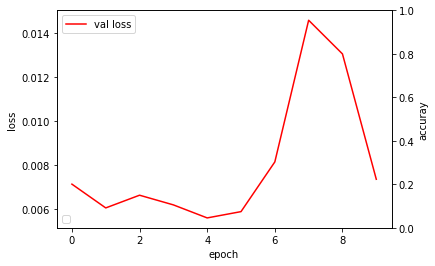

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

No handles with labels found to put in legend.


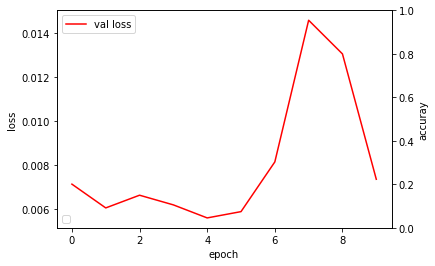

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [158]:
loss = model.evaluate([X_test, y_test], z_test, batch_size=1024)

9/9 [==============================] - 6s 696ms/step - loss: 0.0080 - root_mean_squared_error: 0.0079 - mae: 0.0062 - mape: 1.6169


In [ ]:
loss = model.evaluate([X_test, y_test], z_test, batch_size=1024)

6/6 [==============================] - 1s 156ms/step - loss: 0.0640 - root_mean_squared_error: 0.0647


In [159]:
y_predict = model.predict([X_test, y_test])

In [160]:
y_predict.shape

(8684, 1)

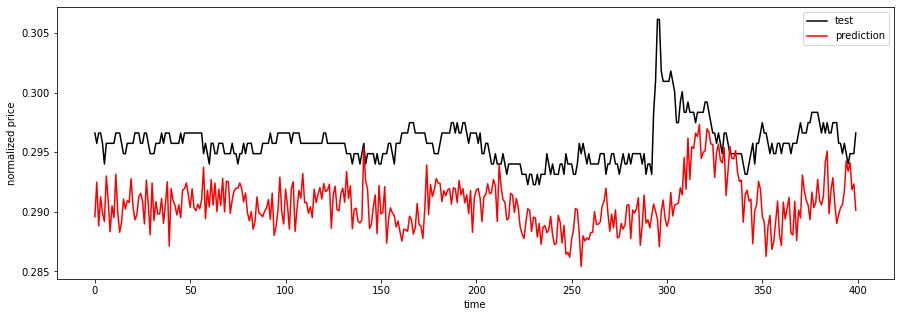

In [161]:
plt.figure(figsize = (15, 5))
plt.plot(z_test[400 :800], color='black', label='test')
plt.plot(y_predict[400 :800], color='red', label='prediction')

# plt.title('Train set')
plt.xlabel('time')
plt.ylabel('normalized price')
plt.legend(loc='best')

In [ ]:
test_ = scaler.transform(test_)
X_test, y_test, z_test = split_data(test_)

y_pred = model.predict([X_train, y_train])

In [ ]:
print(y_predict)

[[0.21179795]
 [0.21611571]
 [0.20782657]
 ...
 [0.32075447]
 [0.31915945]
 [0.32630807]]


In [ ]:
class Evaluation():
  def Prediction(self, pred, true):
    if pred.ndim == 2: # predict_y = (batch, 1)
      pred = pred[np.newaxis, :, :]
      true = true[np.newaxis, :, :]

    rmsre = np.zeros(pred.shape[0])
    dpa = np.zeros(pred.shape[0])
    n = np.zeros(pred.shape[0])

    for i in range(pred.shape[0]): # day
      for j in range(pred.shape[1]): # batch
        if true[i, j, 0] != 0:
          rmsre[i] = rmsre[i] + np.square((pred[i, j, 0] - true[i, j, 0])/true[i, j, 0])
        
        if np.abs(true[i, j, 0]) >= 0.002:
          n[i] += 1
          dpa[i] = dpa[i] + tf.where(tf.math.multiply_no_nan(pred[i, j, 0], true[i, j, 0]) > 0, 1, 0)  
    
    return np.sqrt(rmsre/pred.shape[1]), dpa/n*100

  def Classification(self, pred, true):
    if pred.ndim == 2: # predict_y = (batch, 1)
      pred = pred[np.newaxis, :, :]
      true = true[np.newaxis, :, :]
      
    count = np.zeros(pred.shape[0])
    for i in range(pred.shape[0]): # day
      for j in range(pred.shape[1]): # batch
        if pred[i, j, 0] == true[i, j, 0]:
          count[i] += 1  
    
    return count/pred.shape[1]*100  

In [ ]:
# 모델 불러올거면 사용
model = tf.keras.models.load_model('/content/gdrive/My Drive/AI_Trader/conv1d_lstm.h5') ##############모델불러오기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )
model.summary()

# 회귀

In [ ]:
predict_y = model.predict(test_x) # predict_y = (batch, 1)

predict13_y = [] 
for i in range(day13_x.shape[0]):
  predict13_y.append(model.predict(day13_x[i]))
predict13_y = np.array(predict13_y) # predict13_y = (day(13), batch, 1)

evaluation = Evaluation()
rmsre_P, dpa_P = evaluation.Prediction(predict_y, test_y) # 회귀 (전일 대비 수익률)
rmsre13_P, dpa13_P = evaluation.Prediction(predict13_y, day13_y)

In [ ]:
print('<<7월>>')
print('7월 rmsre :', round(rmsre_P[0], 3))
print('7월 dpa :', round(dpa_P[0], 3), '%')

print('\n<<8월>>')
for i in range(day13_x.shape[0]):
  print(i+1, '일 rmsre :', round(rmsre13_P[i], 3), ' dpa :', round(dpa13_P[i], 3), '%')

# 분류

In [ ]:
predict_y = np.argmax(model.predict(test_x), axis = -1) # one_hot_encoding을 숫자로 변환
predict_y = predict_y[:, np.newaxis] # predict_y = (batch, 1)

predict13_y = [] 
for i in range(day13_x.shape[0]):
  predict13_y.append(np.argmax(model.predict(day13_x[i]), axis = -1)) # one_hot_encoding을 숫자로 변환
predict13_y = np.array(predict13_y) 
predict13_y = predict13_y[:, :, np.newaxis] # predict13_y = (day(13), batch, 1)

evaluation = Evaluation()
accuracy_C = evaluation.Classification(predict_y, test_y) # 분류
accuracy13_C = evaluation.Classification(predict13_y, day13_y)

In [ ]:
print('<<7월>>')
print('7월 정확도 :', round(accuracy_C[0], 3), '%')

print('\n<<8월>>')
for i in range(day13_x.shape[0]):
  print(i+1, '일 정확도 :',  round(accuracy13_C[i], 3), '%')

# 시각화


In [ ]:
################################ 시각화 ###################################
######시각화는 8월의 13일만 보여줌
df = pd.read_csv('/content/gdrive/My Drive/5개 데이터 전처리/현대차_train_modi.csv')    #현대차
#df = pd.read_csv('/content/gdrive/My Drive/5개 데이터 전처리/카카오_train_modi.csv')   #카카오
#df = pd.read_csv('/content/gdrive/My Drive/5개 데이터 전처리/kodex200_train_modi.csv') #코스피
df = df.drop('Unnamed: 0',1)

temp = list(df['날짜'])
df3 = df.iloc[temp.index(20200803.0):] #.csv에서 20200803~ 데이터 추리기 // 약 13일정도 -> 일일 평가 위해서

day_size = 40 #몇 분봉 볼건지
pre_size = 3 #얼마나 예측할지
def 종가추출(df): 
  x=[]
  x2=[]
  #################### (수정해서 사용)###################
  for i in range(len(df)):  #데이터 전처리 방식과 동일하게 종가를 추출해줘야함
    temp = df.iloc[i+day_size-1].values.tolist() ############# input의 마지막 종가 불러오기
    x.append(temp[5]) #temp[5]가 종가
  #######################################################
  x2 = np.array(x2)
  return x2  #shape (13,~)로 나오면됨

price = 종가추출(df3) # 함수알아서 고치기 /df3 = df.iloc[temp.index(20200803.0):]
print(price.shape)
print(predict13_y.shape)
#shape이 같게 나와야함!

In [ ]:
# 13일 데이터 하루하루 그래프 시각화
for i in range(len(price)): #13일치 shape(13,~)
  x = []
  y = []
  x2 = []
  y2 = []
  for j in range(len(price[i])): #하루치
    x.append(j) #index 
    y.append(price[i][j]) #종가저장

    #if day13_y[i][j][0]>0.5:  # <-실제 라벨 상승신호 시각화
    if predict13_y[i][j][0]>0.5: ########################## threshold 설정하기 
      x2.append(j) #index
      y2.append(price[i][j]) #상승신호 나온 종가 저장
      
  print(i+1,'일')
  plt.figure(figsize=(20,5))
  plt.plot(x,y)
  plt.scatter(x2,y2,c='r')
  plt.show()